In [9]:
from jax import config
config.update('jax_enable_x64', True)
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import jax.random as jr
import pandas as pd

from uncprop.utils.experiment import Experiment
from uncprop.models.elliptic_pde.experiment import PDEReplicate

base_dir = Path('/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper')

In [ ]:
key = jr.key(43223)
key, key_experiment = jr.split(key)

experiment_name = 'pde_experiment'
experiment_settings = {
    'name': experiment_name,
    'base_out_dir': base_dir / 'out' / experiment_name,
    'num_reps': 1,
    'base_key': key_experiment,
    'Replicate': PDEReplicate,
    'write_to_file': True,
}

setup_kwargs = {
    'n_design': 50
}

def make_subdir_name(setup_kwargs, run_kwargs):
    n = setup_kwargs['n_design']
    return f'n_design_{n}'

pde_experiment = Experiment(subdir_name_fn=make_subdir_name, 
                            **experiment_settings)



Creating new output directory: /Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/out/pde_experiment


In [3]:
results, failed_reps = pde_experiment(setup_kwargs=setup_kwargs)

Creating experiment sub-directory: /Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/out/pde_experiment/n_design_50
Running replicate 0
No save_results() methods implemented.
0 of 1 replicates failed.


In [ ]:
rep = results[0]

samp = rep.samples['exact']
posterior = rep.posterior

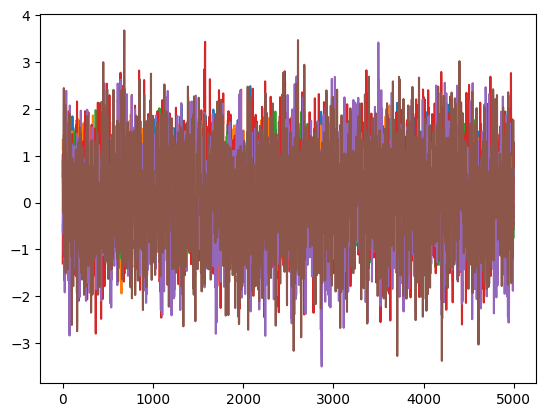

In [7]:
for i in range(posterior.dim):
    plt.plot(samp[:,i])

In [ ]:
key_idx, key_prior_samp, key = jr.split(key, 3)

idx = jr.choice(key_idx, samp.shape[0], (10_000,))
post_samp_df = pd.DataFrame(samp[idx], columns=posterior.prior.par_names)
prior_samp_df = pd.DataFrame(posterior.prior.sample(key_prior_samp, n=10_000), columns=posterior.prior.par_names)

post_samp_df['dataset'] = 'posterior'
prior_samp_df['dataset'] = 'prior'
samp_df = pd.concat([prior_samp_df, post_samp_df], ignore_index=True)

sns.pairplot(samp_df, hue='dataset')